In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from data_prep.prepare import PrepareData

%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

path = r'C:\Users\jthan\OneDrive\Desktop\2023\PP\ElectionSL\data\final.csv'

df = pd.read_csv(path, index_col=0).reset_index()
print(df.shape)

df_copy = df.copy()

(3113, 45)


In [2]:
drop_columns = ['2016_winner', 'FIPS', 'Code', 'Population', 'DEM_per', 'REP_per', 'OTH_per', 'fips_x', 'county', 'state_abbr', 'state', 'fips_y']

df.drop(drop_columns, axis=1, inplace=True)

columns_with_nan = df.columns[df.isna().any()].tolist()

df = df.drop(columns_with_nan, axis=1)

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

label_encoder = LabelEncoder()

df_train, df_test = train_test_split(df, test_size=0.4, shuffle=True, random_state=42)

# split train data set
X_train = df_train.loc[:, df_train.columns != '2020_winner']
y_train = df_train['2020_winner']

# encode y 
encoded_y_train = label_encoder.fit_transform(y_train)
label_encoder_name_mapping = dict(zip(label_encoder.classes_,
                                         label_encoder.transform(label_encoder.classes_)))

# split test data set
X_test = df_test.loc[:, df_test.columns != '2020_winner']
y_test = df_test['2020_winner']

# encode y 
encoded_y_test = label_encoder.fit_transform(y_test)

X_train.head()

,index,per_hs,per_coll,per_grad,EST_RACE_T_POP_One_race_White,EST_RACE_T_POP_One_race_AA,EST_RACE_T_POP_One_race_AI,EST_RACE_T_POP_One_race_Asian,"Percent_CITIZEN,_VOTE,_18_and_over_POP","Percent_CITIZEN,_VOTE,_18_and_over_POP_Male","Percent_CITIZEN,_VOTE,_18_and_over_POP_Female",EST_Percent_T_POP_AGE_20_to_24_years,EST_Percent_T_POP_AGE_25_to_29_years,EST_Percent_T_POP_AGE_35_to_39_years,EST_Percent_T_POP_AGE_40_to_44_years,EST_Percent_T_POP_AGE_45_to_49_years,EST_Percent_T_POP_AGE_50_to_54_years,EST_Percent_T_POP_AGE_55_to_59_years,EST_Percent_T_POP_AGE_60_to_64_years,EST_Percent_T_POP_AGE_65_to_69_years,EST_Percent_T_POP_AGE_70_to_74_years,EST_Percent_T_POP_AGE_75_to_79_years,EST_Percent_T_POP_AGE_80_to_84_years,EST_Percent_T_POP_AGE_85_YO,EST_HH_Mean_income_(dollars),MOE_HH_Mean_income_(dollars),EST_T_CE_POP_16_YO,EST_T_PERCENT_ALLOCATED_Occupation
503,503,37.2155,40.5423,4.9494,17905,7285,164,105,19999,46.5,53.5,5.8,7.1,5.3,7.2,5.9,6.8,7.5,6.7,6.3,4.3,3.5,1.9,2.4,53108,3007,10885,13.8
1321,1321,37.8257,50.8550,4.7842,6347,37,15,59,5260,49.6,50.4,4.5,4.0,4.3,4.6,5.3,6.0,8.4,8.3,8.0,5.0,5.2,3.6,5.3,74952,4376,3288,7.4
2314,2314,36.7376,44.8014,7.7078,46366,15566,213,210,49969,47.5,52.5,5.2,6.1,5.6,5.8,6.3,6.9,6.9,7.4,6.7,4.7,3.4,2.0,1.8,65336,2541,28160,13.3
2862,2862,30.4059,52.6105,6.7451,22326,12254,208,588,29522,54.6,45.4,6.2,7.5,8.2,7.0,5.8,6.5,6.1,6.2,5.1,3.4,2.6,1.5,1.3,92280,5617,15111,16.9
1340,1340,27.2466,56.9598,7.9088,54943,682,228,277,45032,49.9,50.1,4.9,4.5,5.0,5.1,4.9,6.6,8.1,8.2,7.6,5.6,4.0,3.2,3.6,76115,2247,28521,10.2


In [4]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import time

start = time.time()

# create adaboost classifier object
ada = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), 
    random_state=42
    )

ada.fit(X_train, encoded_y_train)

end = time.time()
print(f"Runtime of the program is {end - start}")

Runtime of the program is 0.3721437454223633


In [5]:
from sklearn.metrics import f1_score

start = time.time()

y_pred = ada.predict(X_test)

end = time.time()
true_time = end - start

print(f"Prediction time: {true_time} seconds")
f1_score(encoded_y_test, y_pred)
print(f"F1 score: {round(f1_score(encoded_y_test, y_pred), 4)*100}%")

Prediction time: 0.011197805404663086 seconds
F1 score: 93.02%


In [7]:
from sklearn.model_selection import cross_validate

decision_tree_result = cross_validate(ada, X_train, encoded_y_train, scoring='f1', cv=5)

print(decision_tree_result['test_score'])
print(f"avg score: {round(decision_tree_result['test_score'].mean()*100, 4)}%")

[0.92890995 0.93699515 0.95886076 0.93502377 0.92834891]
avg score: 93.7628%


[[0.93125    0.9218241  0.9344     0.92431562 0.921875  ]
 [0.9170579  0.92332268 0.94753577 0.90423862 0.91107644]
 [0.91222571 0.93030794 0.94770206 0.92307692 0.92163009]
 [0.92018779 0.93163752 0.93910256 0.9223301  0.928125  ]
 [0.90909091 0.9273021  0.94267516 0.92698413 0.92236025]
 [0.91653543 0.92903226 0.94620253 0.93247588 0.92043682]
 [0.92935636 0.93225806 0.9478673  0.93206951 0.921875  ]
 [0.92379471 0.93569132 0.9540412  0.93481717 0.928125  ]
 [0.93125    0.93269231 0.95418641 0.94603175 0.92379471]
 [0.92890995 0.93699515 0.95734597 0.93502377 0.92834891]]


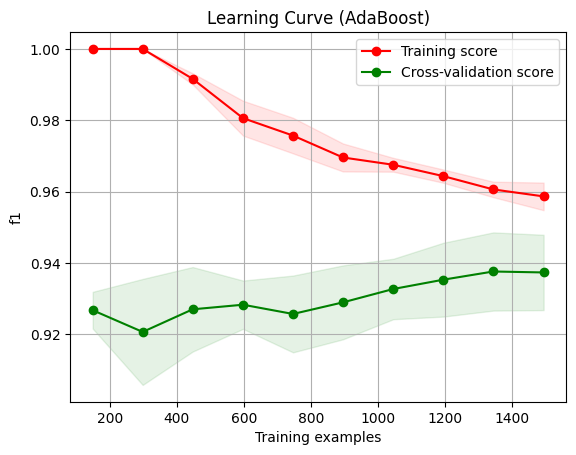

In [8]:
from sklearn.model_selection import learning_curve


train_sizes, train_scores, test_scores = learning_curve(
        ada, X_train, encoded_y_train, cv=None, n_jobs=10, scoring='f1', train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure()
plt.title("Learning Curve (AdaBoost)")

plt.xlabel("Training examples")
plt.ylabel("f1")

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.1,
                color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
        label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
        label="Cross-validation score")

plt.legend(loc="best")

print(test_scores)
plt.show()

precision: 91.16279069767442 = 980/980 + 95
recall: 94.96124031007753 = 980/980 + 52
--------------------------------------------------
{'Biden': 0, 'Trump': 1}


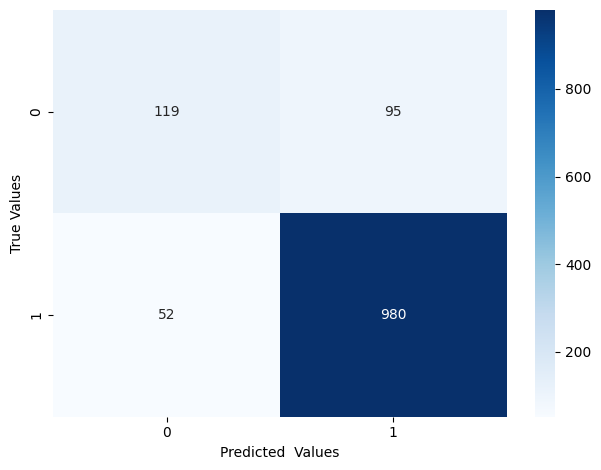

In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

cm = confusion_matrix(encoded_y_test, y_pred)

ax = sns.heatmap(
    cm,
    annot=True,
    cmap='Blues',
    fmt='g'
)

ax.set(xlabel="Predicted  Values", ylabel="True Values")

print(f"precision: {precision_score(encoded_y_test, y_pred)*100} = {cm[1,1]}/{cm[1,1]} + {cm[0,1]}")
print(f"recall: {recall_score(encoded_y_test, y_pred)*100} = {cm[1,1]}/{cm[1,1]} + {cm[1,0]}")
print('-'*50)
print(label_encoder_name_mapping)

plt.tight_layout()
plt.show()

## grid search

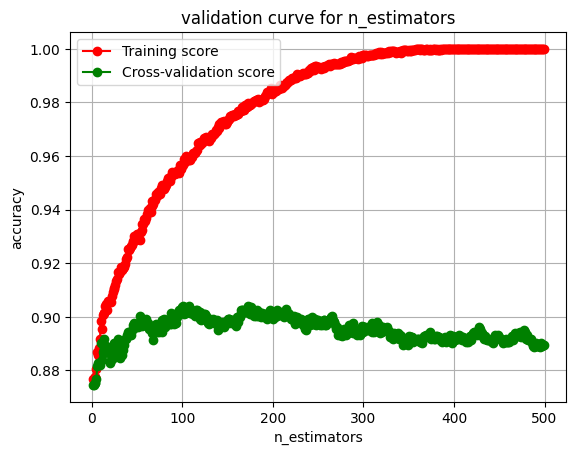

In [12]:
from sklearn.model_selection import validation_curve
import numpy as np

param_range = np.arange(0, 500, 1)

hyper_param = 'n_estimators'
metric = 'accuracy'

train_scores, test_scores = validation_curve(
    ada, X_train, y_train,
    param_name=hyper_param,
    param_range=param_range,
    cv=4,
    scoring=metric,
    n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure()
plt.xlabel(hyper_param)
plt.ylabel(metric)
plt.grid()
plt.title('validation curve for n_estimators')
plt.plot(param_range, train_mean, 'o-', label="Training score", color="r")
plt.plot(param_range, test_mean, 'o-', label="Cross-validation score", color="g")
plt.legend(loc="best")
#plt.axvline(x=37, color='black', linestyle='--')
plt.show()

In [14]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': np.arange(0, 400, 20),
    'learning_rate': np.arange(0, .4, 0.1)  
}

grid_search = GridSearchCV(estimator=ada, param_grid=param_grid, scoring='accuracy', cv=5)

grid_search.fit(X_train, y_train)

best_n_estimators = grid_search.best_params_['n_estimators']
best_learning_rate = grid_search.best_params_['learning_rate']
best_model = grid_search.best_estimator_
best_score = grid_search.best_score_

print(f"Best n_estimators: {best_n_estimators}")
print(f"Best learning_rate: {best_learning_rate}")
print(f"Best score: {best_score}")

c:\Users\jthan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
115 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jthan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jthan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\jthan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base

Best n_estimators: 160
Best learning_rate: 0.30000000000000004
Best score: 0.8971670657051511


## second model

In [15]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import time

start = time.time()

# create adaboost classifier object
ada = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), 
    random_state=42,
    n_estimators=best_n_estimators,
    learning_rate=best_learning_rate
    )

ada.fit(X_train, encoded_y_train)

end = time.time()
print(f"Runtime of the program is {end - start}")

Runtime of the program is 1.270320177078247


In [16]:
from sklearn.metrics import f1_score

start = time.time()

y_pred = ada.predict(X_test)

end = time.time()
true_time = end - start

print(f"Prediction time: {true_time} seconds")
f1_score(encoded_y_test, y_pred)
print(f"F1 score: {round(f1_score(encoded_y_test, y_pred), 4)*100}%")

Prediction time: 0.032430410385131836 seconds
F1 score: 93.61%


In [17]:
from sklearn.model_selection import cross_validate

decision_tree_result = cross_validate(ada, X_train, encoded_y_train, scoring='f1', cv=5)

print(decision_tree_result['test_score'])
print(f"avg score: {round(decision_tree_result['test_score'].mean()*100, 4)}%")

[0.93125    0.94060995 0.96050553 0.93543307 0.93087558]
avg score: 93.9735%


[[0.92117465 0.91118421 0.9300813  0.91465378 0.90064103]
 [0.90795632 0.928      0.94470774 0.9122807  0.91925466]
 [0.91392801 0.92753623 0.9478673  0.92234548 0.91993721]
 [0.921875   0.93290735 0.94303797 0.92721519 0.92331768]
 [0.91731669 0.94249201 0.95418641 0.92767296 0.92426584]
 [0.921875   0.94098884 0.95163807 0.93206951 0.92879257]
 [0.92834891 0.94117647 0.95433071 0.93563579 0.92857143]
 [0.93209877 0.93949045 0.95583596 0.92890995 0.93209877]
 [0.93146417 0.944      0.95418641 0.92721519 0.93230769]
 [0.93125    0.94060995 0.96050553 0.93081761 0.93230769]]


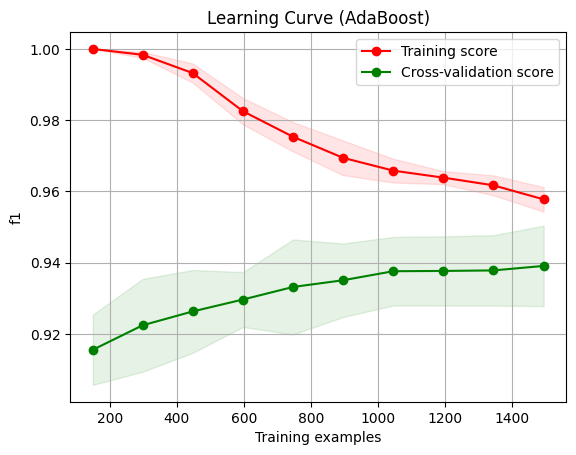

In [18]:
from sklearn.model_selection import learning_curve


train_sizes, train_scores, test_scores = learning_curve(
        ada, X_train, encoded_y_train, cv=None, n_jobs=10, scoring='f1', train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure()
plt.title("Learning Curve (AdaBoost)")

plt.xlabel("Training examples")
plt.ylabel("f1")

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.1,
                color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
        label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
        label="Cross-validation score")

plt.legend(loc="best")

print(test_scores)
plt.show()

precision: 90.87591240875912 = 996/996 + 100
recall: 96.51162790697676 = 996/996 + 36
--------------------------------------------------
{'Biden': 0, 'Trump': 1}


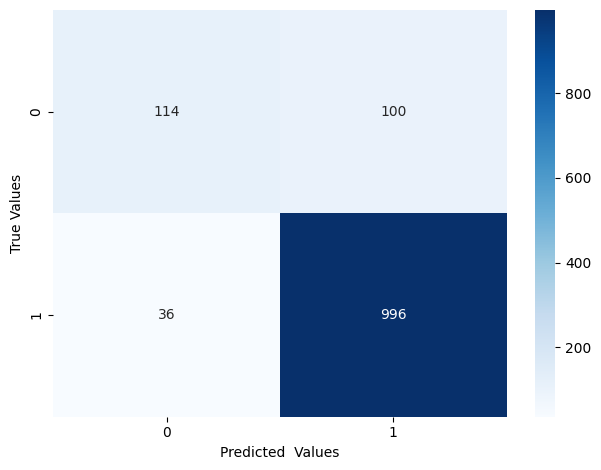

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

cm = confusion_matrix(encoded_y_test, y_pred)

ax = sns.heatmap(
    cm,
    annot=True,
    cmap='Blues',
    fmt='g'
)

ax.set(xlabel="Predicted  Values", ylabel="True Values")

print(f"precision: {precision_score(encoded_y_test, y_pred)*100} = {cm[1,1]}/{cm[1,1]} + {cm[0,1]}")
print(f"recall: {recall_score(encoded_y_test, y_pred)*100} = {cm[1,1]}/{cm[1,1]} + {cm[1,0]}")
print('-'*50)
print(label_encoder_name_mapping)

plt.tight_layout()
plt.show()